In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv('ObesityDataSet.csv')

In [38]:
df.drop(columns='Unnamed: 0')

,Gender,Age,Height,Weight,family_history_with_overweight,high_caloric_food,use_vegetables,num_meals_daily,food_bw_meals,smoking,CH2O,monitor_num_calories,physical_activity,use_technological_devices,alcohol,traveling,obesity_level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [39]:
df.head(20)

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,high_caloric_food,use_vegetables,num_meals_daily,food_bw_meals,smoking,CH2O,monitor_num_calories,physical_activity,use_technological_devices,alcohol,traveling,obesity_level
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [40]:
avg=df['Weight'].mean()
print('Average',avg)

Average 86.58605812648035


In [41]:
many=df['Height'].mode()
print('mode',many)

mode 0    1.7
Name: Height, dtype: float64


In [42]:
df.dtypes

Unnamed: 0                          int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
high_caloric_food                  object
use_vegetables                    float64
num_meals_daily                   float64
food_bw_meals                      object
smoking                            object
CH2O                              float64
monitor_num_calories               object
physical_activity                 float64
use_technological_devices         float64
alcohol                            object
traveling                          object
obesity_level                      object
dtype: object

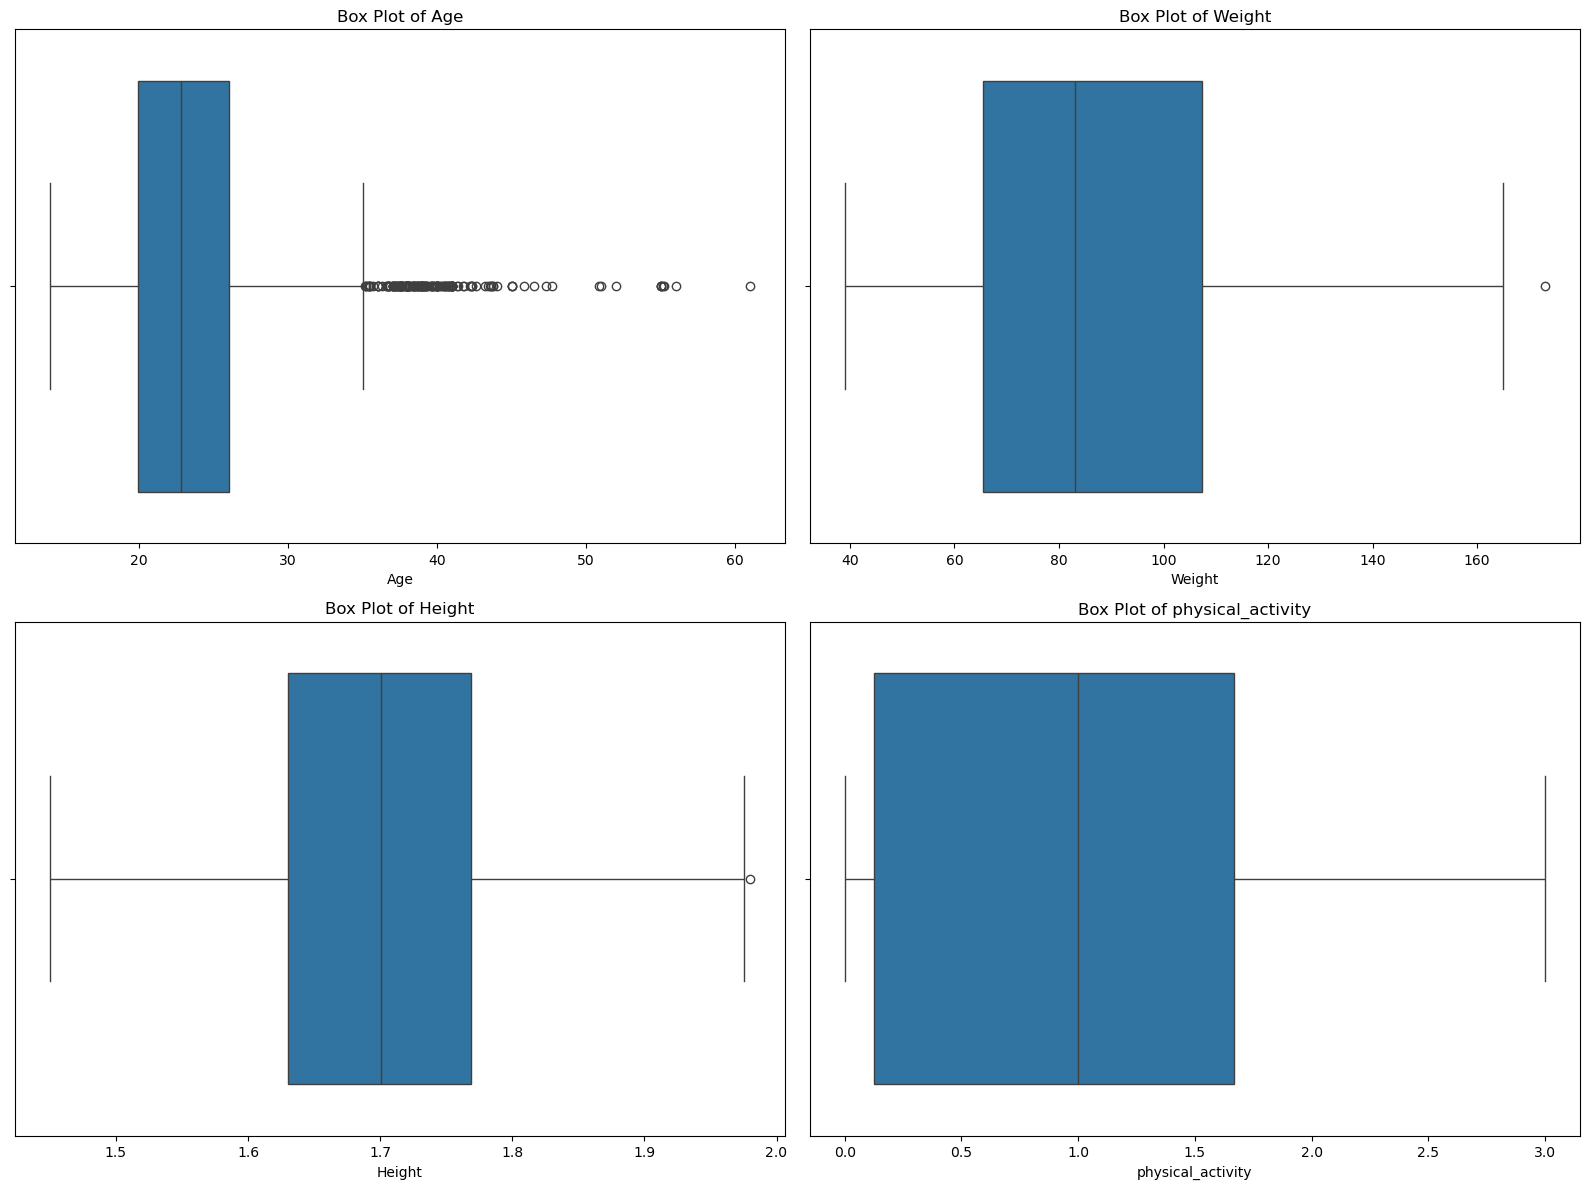

In [43]:
# Create subplots manually
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns

# Boxplot 1 - Age
sns.boxplot(x=df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Age')

# Boxplot 2 - Weight
sns.boxplot(x=df['Weight'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Weight')

# Boxplot 3 - Height
sns.boxplot(x=df['Height'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Height')

# Boxplot 4 - physical_activity
sns.boxplot(x=df['physical_activity'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of physical_activity')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


In [44]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define the “normal” range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter out the outliers
df = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)]


In [45]:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define the “normal” range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter out the outliers
df = df[(df['Height'] >= lower_bound) & (df['Height'] <= upper_bound)]

print(f"Original rows: {len(df)}")

Original rows: 2109


C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\714344120.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["obesity_level"], y=df["Weight"], ci=None, palette="viridis", ax=axes[0, 0])
C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\714344120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["obesity_level"], y=df["Weight"], ci=None, palette="viridis", ax=axes[0, 0])
C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\714344120.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["obesity_level"], y=df["Height"], ci=None, palette="viridis", ax=axes[0, 1])
C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\714344120.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

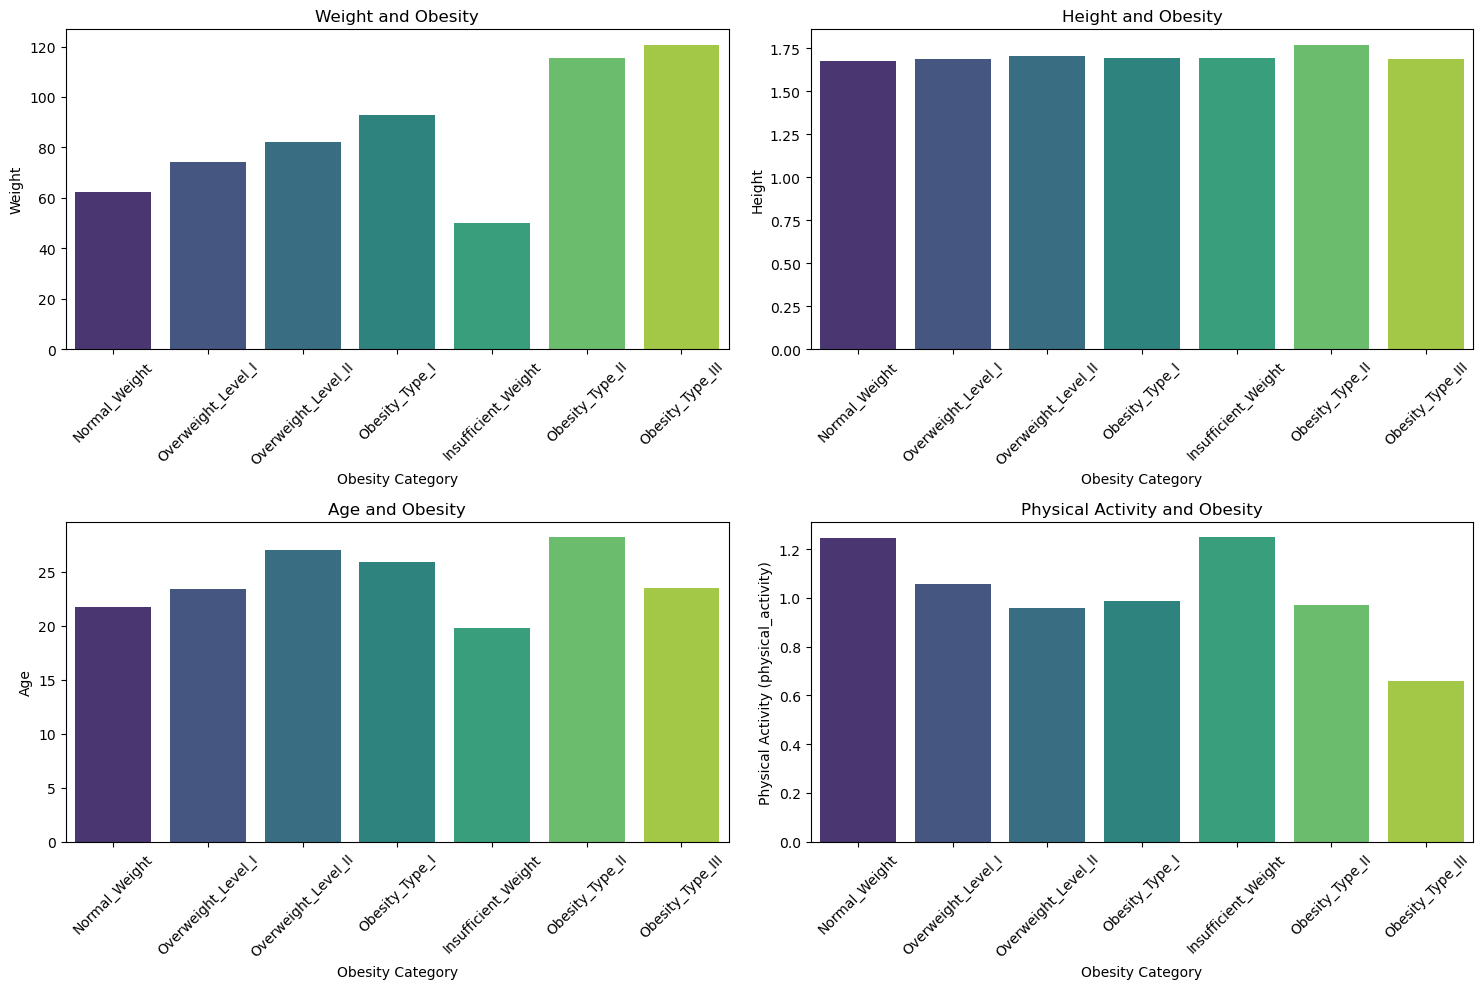

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Barplot 1 - Weight vs Obesity
sns.barplot(x=df["obesity_level"], y=df["Weight"], ci=None, palette="viridis", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xlabel("Obesity Category")
axes[0, 0].set_ylabel("Weight")
axes[0, 0].set_title("Weight and Obesity")

# Barplot 2 - Height vs Obesity
sns.barplot(x=df["obesity_level"], y=df["Height"], ci=None, palette="viridis", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xlabel("Obesity Category")
axes[0, 1].set_ylabel("Height")
axes[0, 1].set_title("Height and Obesity")

# Barplot 3 - Age vs Obesity
sns.barplot(x=df["obesity_level"], y=df["Age"], ci=None, palette="viridis", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xlabel("Obesity Category")
axes[1, 0].set_ylabel("Age")
axes[1, 0].set_title("Age and Obesity")

# Barplot 4 - Physical Activity vs Obesity (FAF → physical_activity)
sns.barplot(x=df["obesity_level"], y=df["physical_activity"], ci=None, palette="viridis", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xlabel("Obesity Category")
axes[1, 1].set_ylabel("Physical Activity (physical_activity)")
axes[1, 1].set_title("Physical Activity and Obesity")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [47]:
df.duplicated().sum()

0

In [48]:
df=df.drop_duplicates()

In [49]:
df.duplicated().sum()

0

In [50]:
df.shape[0]

2109

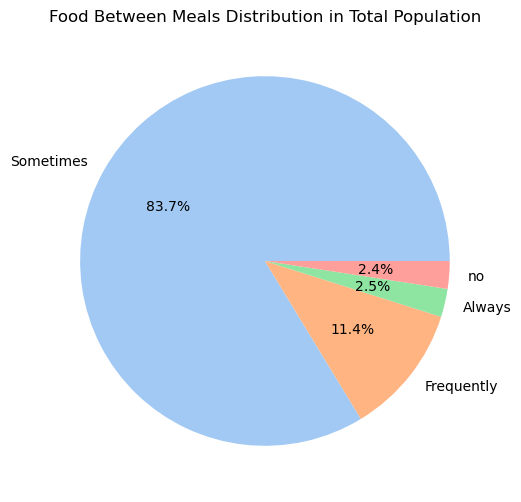

In [51]:
plt.figure(figsize=(6, 6))
df["food_bw_meals"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.ylabel("")  # Hide y-axis label
plt.title("Food Between Meals Distribution in Total Population")
plt.show()

In [52]:
sample_df = df.sample(n=300, random_state=42)  # random_state for reproducibility


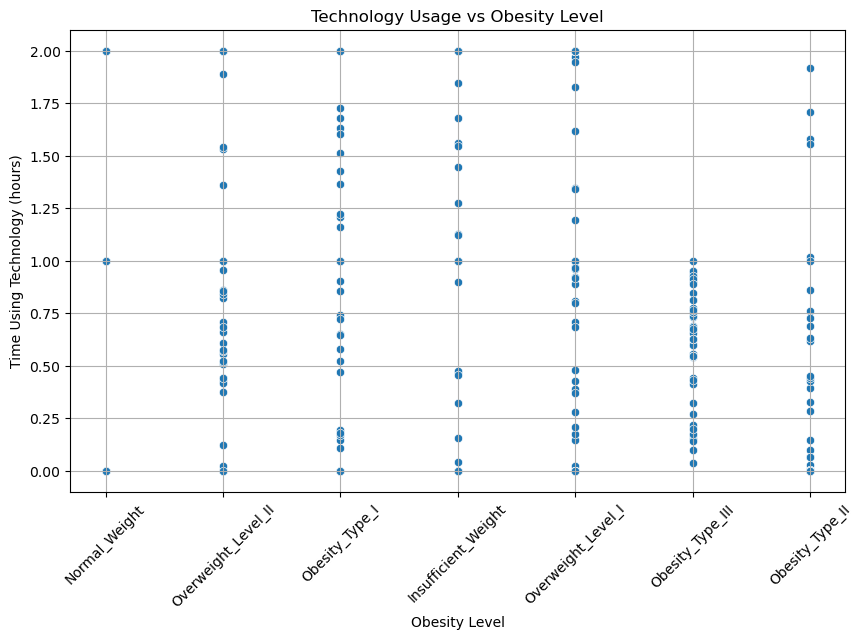

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='obesity_level', y='use_technological_devices', data=sample_df)

plt.title('Technology Usage vs Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Time Using Technology (hours)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


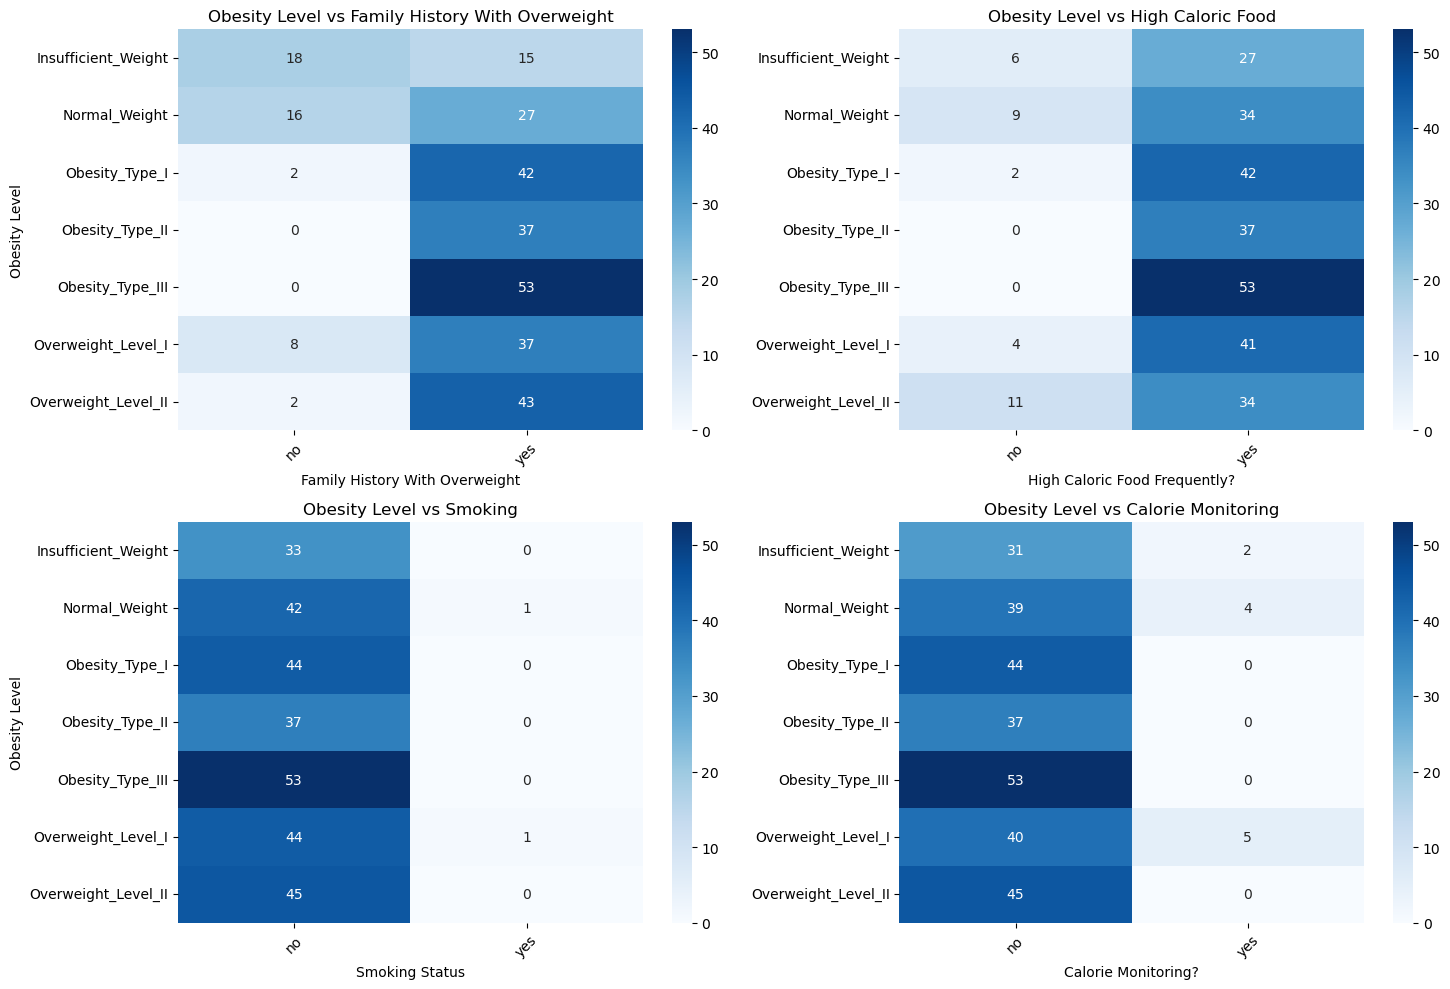

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns
fig.subplots_adjust(wspace=1, hspace=3) 

# Heatmap 1: obesity_level vs family_history_with_overweight
ct1 = pd.crosstab(sample_df['obesity_level'], sample_df['family_history_with_overweight'])
sns.heatmap(ct1, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Obesity Level vs Family History With Overweight')
axes[0, 0].set_xlabel('Family History With Overweight')
axes[0, 0].set_ylabel('Obesity Level')
axes[0, 0].tick_params(axis='x', rotation=45)

# Heatmap 2: obesity_level vs high_caloric_food
ct2 = pd.crosstab(sample_df['obesity_level'], sample_df['high_caloric_food'])
sns.heatmap(ct2, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Obesity Level vs High Caloric Food')
axes[0, 1].set_xlabel('High Caloric Food Frequently?')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Heatmap 3: obesity_level vs smoking
ct3 = pd.crosstab(sample_df['obesity_level'], sample_df['smoking'])
sns.heatmap(ct3, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Obesity Level vs Smoking')
axes[1, 0].set_xlabel('Smoking Status')
axes[1, 0].set_ylabel('Obesity Level')
axes[1, 0].tick_params(axis='x', rotation=45)

# Heatmap 4: obesity_level vs monitor_num_calories
ct4 = pd.crosstab(sample_df['obesity_level'], sample_df['monitor_num_calories'])
sns.heatmap(ct4, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Obesity Level vs Calorie Monitoring')
axes[1, 1].set_xlabel('Calorie Monitoring?')
axes[1, 1].set_ylabel('')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


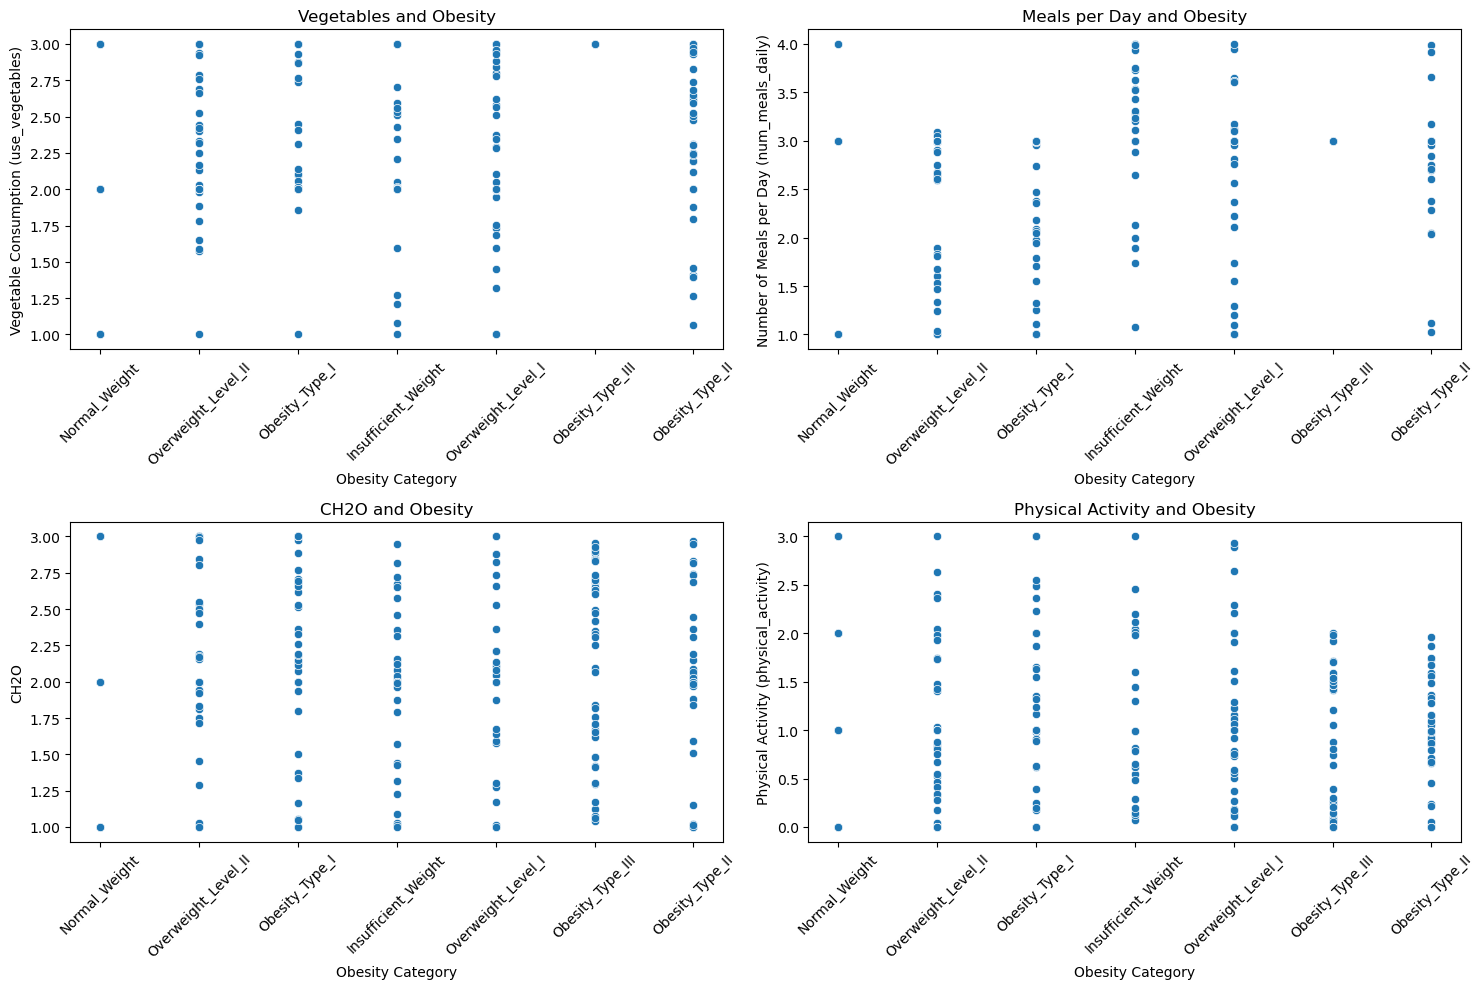

In [55]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Scatterplot 1 - use_vegetables vs obesity_level
sns.scatterplot(x=sample_df["obesity_level"], y=sample_df["use_vegetables"], ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xlabel("Obesity Category")
axes[0, 0].set_ylabel("Vegetable Consumption (use_vegetables)")
axes[0, 0].set_title("Vegetables and Obesity")

# Scatterplot 2 - num_meals_daily vs obesity_level
sns.scatterplot(x=sample_df["obesity_level"], y=sample_df["num_meals_daily"], ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xlabel("Obesity Category")
axes[0, 1].set_ylabel("Number of Meals per Day (num_meals_daily)")
axes[0, 1].set_title("Meals per Day and Obesity")

# Scatterplot 3 - CH2O vs obesity_level (No change)
sns.scatterplot(x=sample_df["obesity_level"], y=sample_df["CH2O"], ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xlabel("Obesity Category")
axes[1, 0].set_ylabel("CH2O")
axes[1, 0].set_title("CH2O and Obesity")

# Scatterplot 4 - physical_activity vs obesity_level
sns.scatterplot(x=sample_df["obesity_level"], y=sample_df["physical_activity"], ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xlabel("Obesity Category")
axes[1, 1].set_ylabel("Physical Activity (physical_activity)")
axes[1, 1].set_title("Physical Activity and Obesity")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



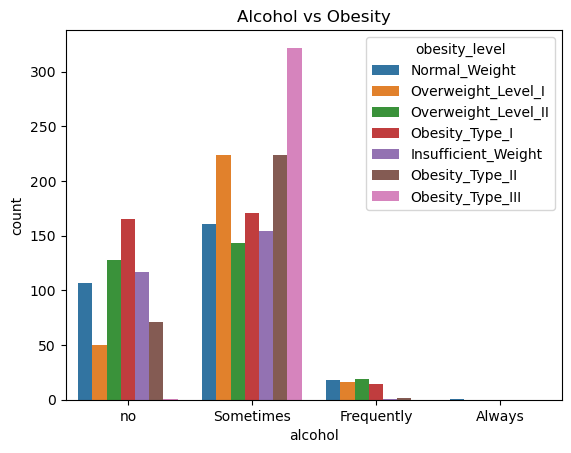

In [56]:
sns.countplot(x='alcohol', hue='obesity_level', data=df)
plt.title('Alcohol vs Obesity')
plt.show()

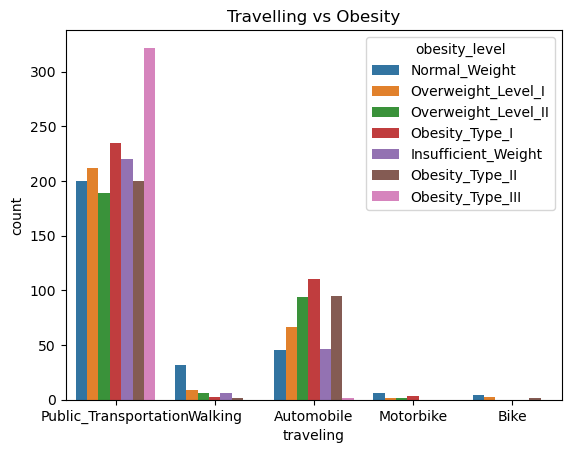

In [57]:
sns.countplot(x='traveling', hue='obesity_level', data=df)
plt.title('Travelling vs Obesity')
plt.show()

In [58]:
df1=sample_df[sample_df['Gender']=='Male']
df2=sample_df[sample_df['Gender']=='Female']

In [59]:
avg=df1['Weight'].mean()
print('Average',avg)

Average 91.44184264137931


In [60]:
many=df1['Height'].mode()
print('mode',many)

mode 0    1.7
Name: Height, dtype: float64


C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\3101597538.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df1["obesity_level"], y=df1["Weight"], ci=None, palette="viridis", ax=axes[0, 0])
C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\3101597538.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1["obesity_level"], y=df1["Weight"], ci=None, palette="viridis", ax=axes[0, 0])
C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\3101597538.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df1["obesity_level"], y=df1["Height"], ci=None, palette="viridis", ax=axes[0, 1])
C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\3101597538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` 

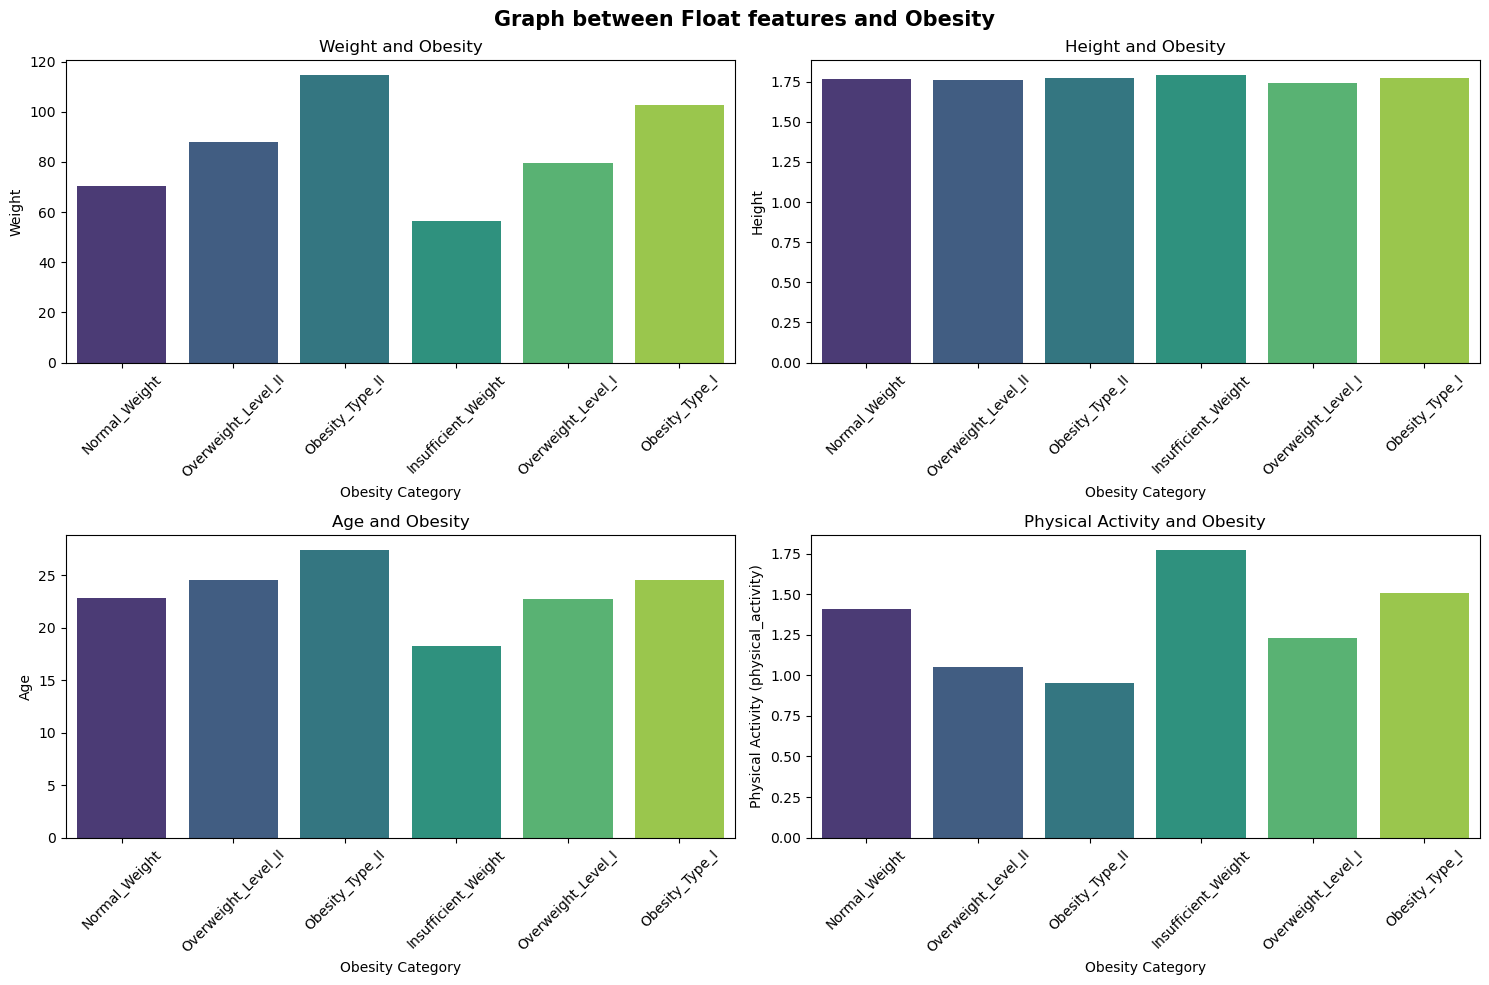

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

plt.suptitle('Graph between Float features and Obesity', fontsize=15, fontweight='bold')

# Barplot 1 - Weight vs Obesity
sns.barplot(x=df1["obesity_level"], y=df1["Weight"], ci=None, palette="viridis", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xlabel("Obesity Category")
axes[0, 0].set_ylabel("Weight")
axes[0, 0].set_title("Weight and Obesity")

# Barplot 2 - Height vs Obesity
sns.barplot(x=df1["obesity_level"], y=df1["Height"], ci=None, palette="viridis", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xlabel("Obesity Category")
axes[0, 1].set_ylabel("Height")
axes[0, 1].set_title("Height and Obesity")

# Barplot 3 - Age vs Obesity
sns.barplot(x=df1["obesity_level"], y=df1["Age"], ci=None, palette="viridis", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xlabel("Obesity Category")
axes[1, 0].set_ylabel("Age")
axes[1, 0].set_title("Age and Obesity")

# Barplot 4 - Physical Activity vs Obesity (FAF → physical_activity)
sns.barplot(x=df1["obesity_level"], y=df1["physical_activity"], ci=None, palette="viridis", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xlabel("Obesity Category")
axes[1, 1].set_ylabel("Physical Activity (physical_activity)")
axes[1, 1].set_title("Physical Activity and Obesity")

plt.tight_layout()
#saving the figure
plt.savefig('male_1.png')
# Show the plots
plt.show()


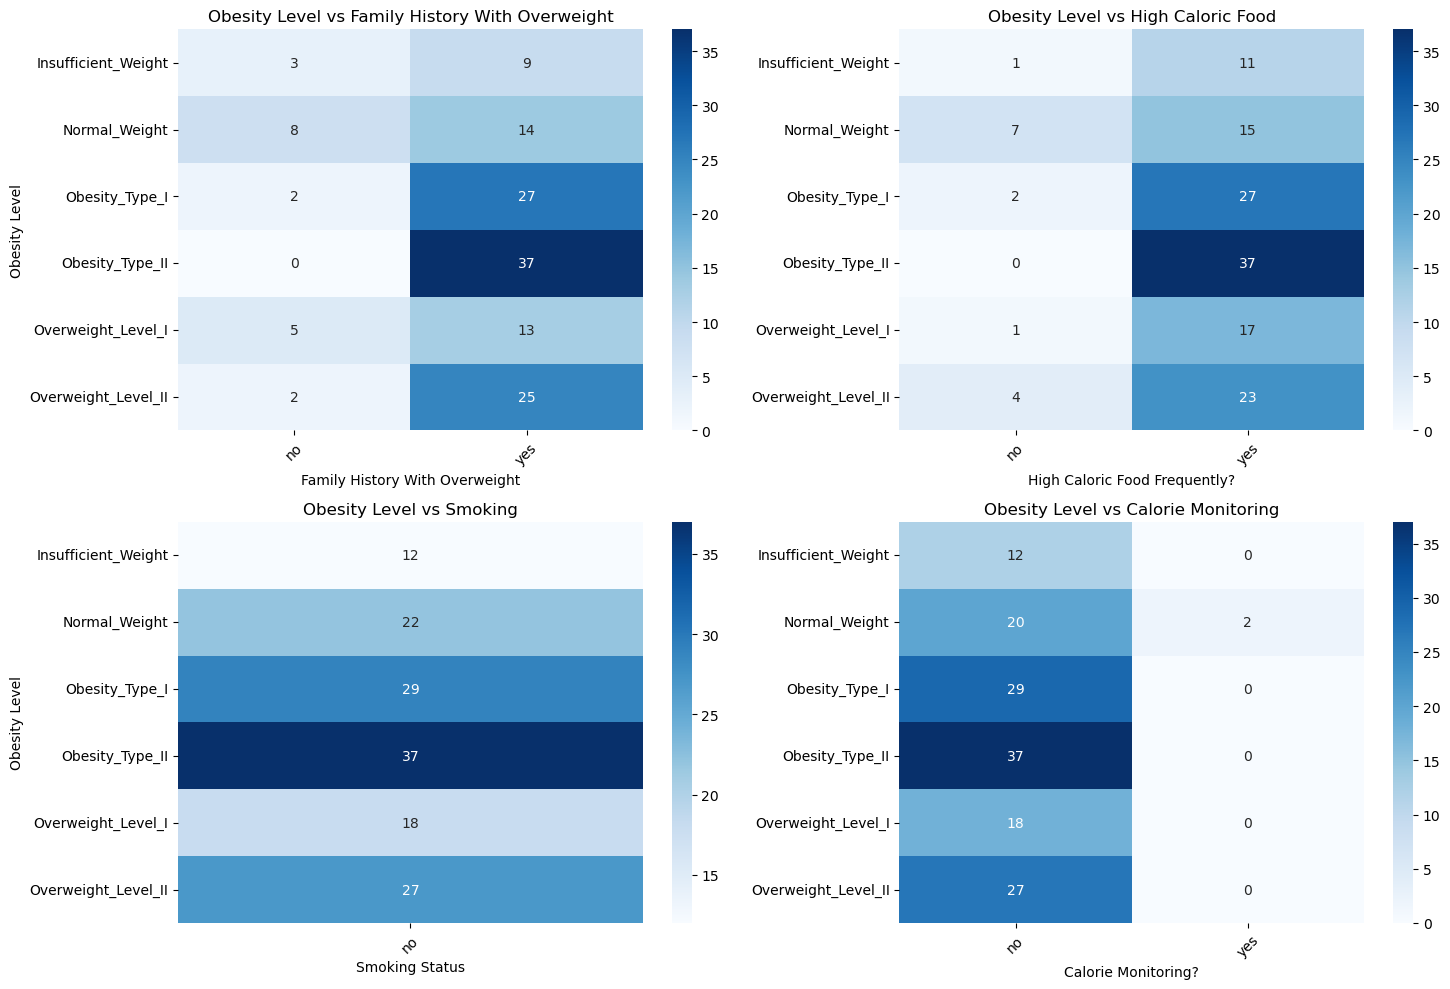

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns
fig.subplots_adjust(wspace=1, hspace=3) 

# Heatmap 1: obesity_level vs family_history_with_overweight
ct1 = pd.crosstab(df1['obesity_level'], df1['family_history_with_overweight'])
sns.heatmap(ct1, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Obesity Level vs Family History With Overweight')
axes[0, 0].set_xlabel('Family History With Overweight')
axes[0, 0].set_ylabel('Obesity Level')
axes[0, 0].tick_params(axis='x', rotation=45)

# Heatmap 2: obesity_level vs high_caloric_food
ct2 = pd.crosstab(df1['obesity_level'], df1['high_caloric_food'])
sns.heatmap(ct2, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Obesity Level vs High Caloric Food')
axes[0, 1].set_xlabel('High Caloric Food Frequently?')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Heatmap 3: obesity_level vs smoking
ct3 = pd.crosstab(df1['obesity_level'], df1['smoking'])
sns.heatmap(ct3, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Obesity Level vs Smoking')
axes[1, 0].set_xlabel('Smoking Status')
axes[1, 0].set_ylabel('Obesity Level')
axes[1, 0].tick_params(axis='x', rotation=45)

# Heatmap 4: obesity_level vs monitor_num_calories
ct4 = pd.crosstab(df1['obesity_level'], df1['monitor_num_calories'])
sns.heatmap(ct4, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Obesity Level vs Calorie Monitoring')
axes[1, 1].set_xlabel('Calorie Monitoring?')
axes[1, 1].set_ylabel('')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('male_2.png')
plt.show()


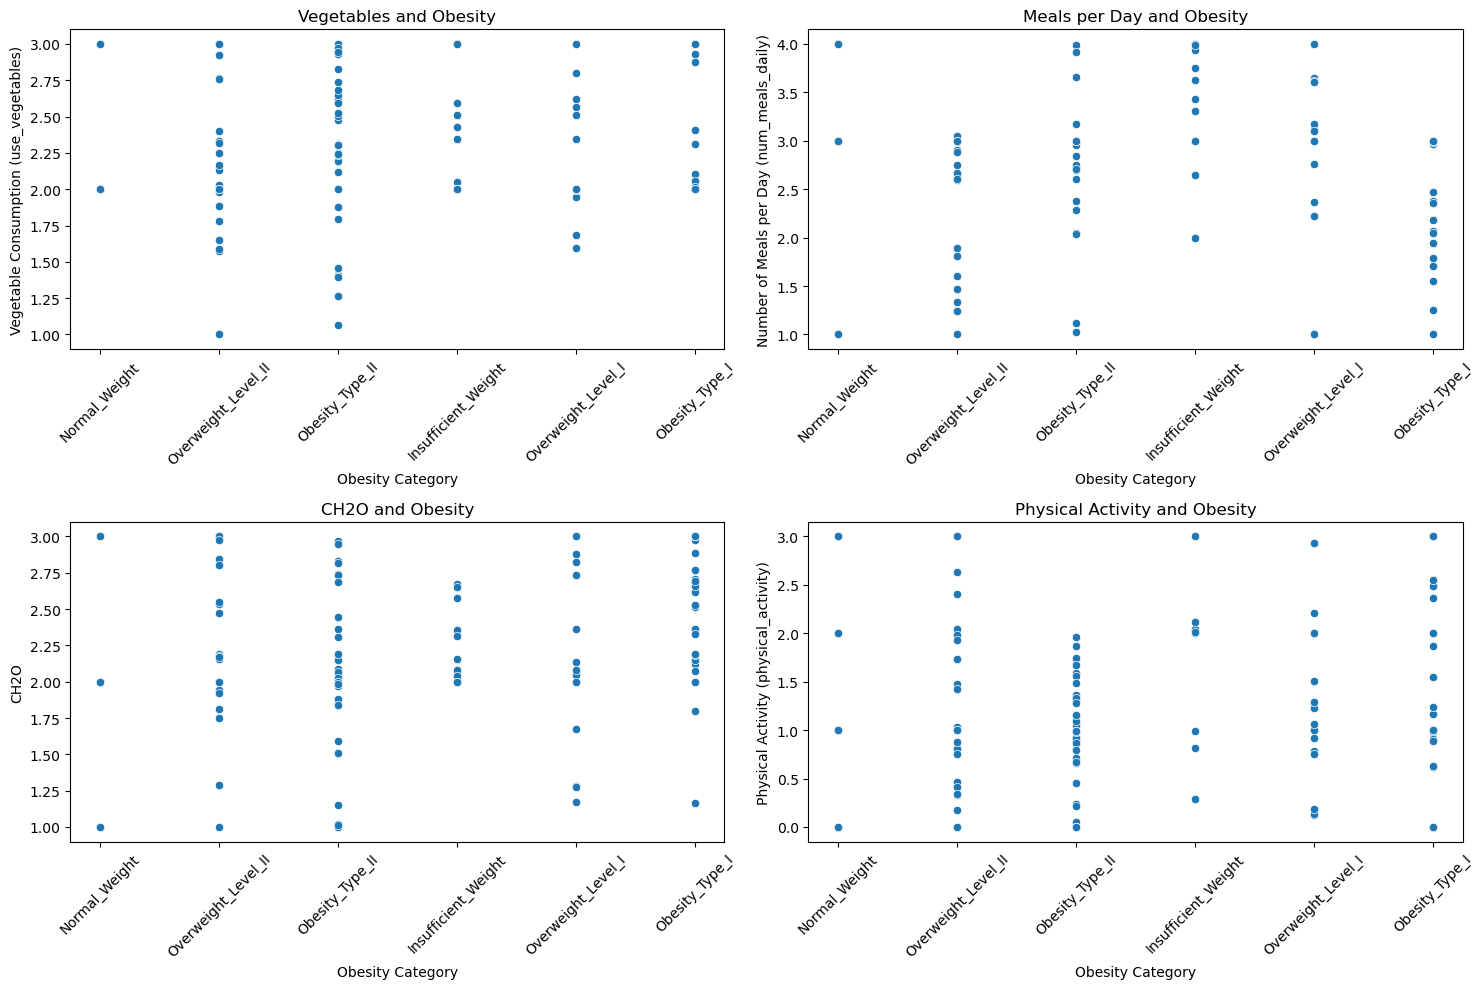

In [63]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Scatterplot 1 - use_vegetables vs obesity_level
sns.scatterplot(x=df1["obesity_level"], y=df1["use_vegetables"], ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xlabel("Obesity Category")
axes[0, 0].set_ylabel("Vegetable Consumption (use_vegetables)")
axes[0, 0].set_title("Vegetables and Obesity")

# Scatterplot 2 - num_meals_daily vs obesity_level
sns.scatterplot(x=df1["obesity_level"], y=df1["num_meals_daily"], ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xlabel("Obesity Category")
axes[0, 1].set_ylabel("Number of Meals per Day (num_meals_daily)")
axes[0, 1].set_title("Meals per Day and Obesity")

# Scatterplot 3 - CH2O vs obesity_level (No change)
sns.scatterplot(x=df1["obesity_level"], y=df1["CH2O"], ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xlabel("Obesity Category")
axes[1, 0].set_ylabel("CH2O")
axes[1, 0].set_title("CH2O and Obesity")

# Scatterplot 4 - physical_activity vs obesity_level
sns.scatterplot(x=df1["obesity_level"], y=df1["physical_activity"], ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xlabel("Obesity Category")
axes[1, 1].set_ylabel("Physical Activity (physical_activity)")
axes[1, 1].set_title("Physical Activity and Obesity")

# Adjust layout
plt.tight_layout()

#'male_3.png')
# Show the plots
plt.show()



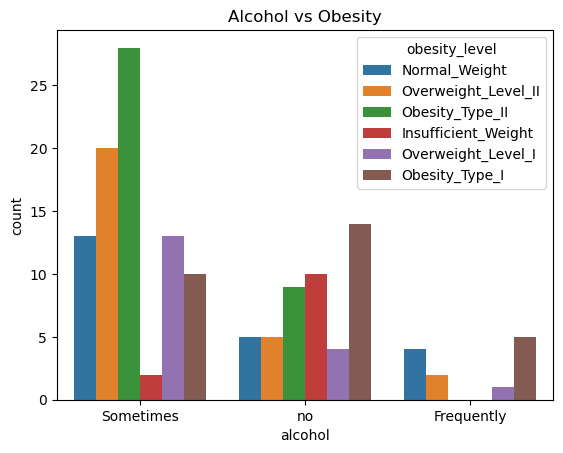

In [64]:
sns.countplot(x='alcohol', hue='obesity_level', data=df1)
plt.title('Alcohol vs Obesity')
plt.savefig('male_4.png')
plt.show()

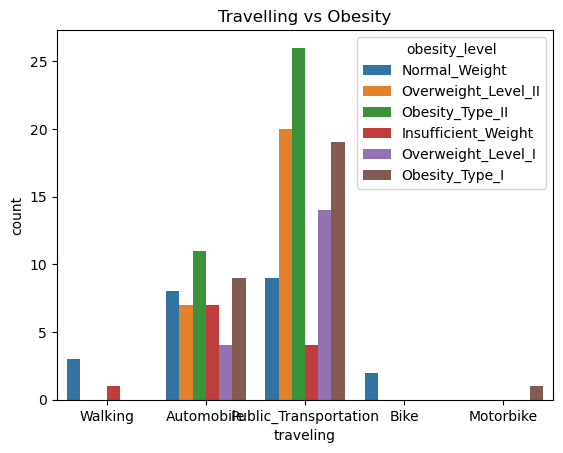

In [65]:
sns.countplot(x='traveling', hue='obesity_level', data=df1)
plt.title('Travelling vs Obesity')
plt.savefig('male_5.png')
plt.show()

In [66]:
avg=df1['Weight'].mean()
print('Average',avg)

Average 91.44184264137931


In [67]:
many=df1['Height'].mode()
print('mode',many)

mode 0    1.7
Name: Height, dtype: float64


C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\1734162049.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df2["obesity_level"], y=df2["Weight"], ci=None, palette="viridis", ax=axes[0, 0])
C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\1734162049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df2["obesity_level"], y=df2["Weight"], ci=None, palette="viridis", ax=axes[0, 0])
C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\1734162049.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df2["obesity_level"], y=df2["Height"], ci=None, palette="viridis", ax=axes[0, 1])
C:\Users\This PC\AppData\Local\Temp\ipykernel_10092\1734162049.py:11: FutureWarning: 

Passing `palette` without assigning `hue` 

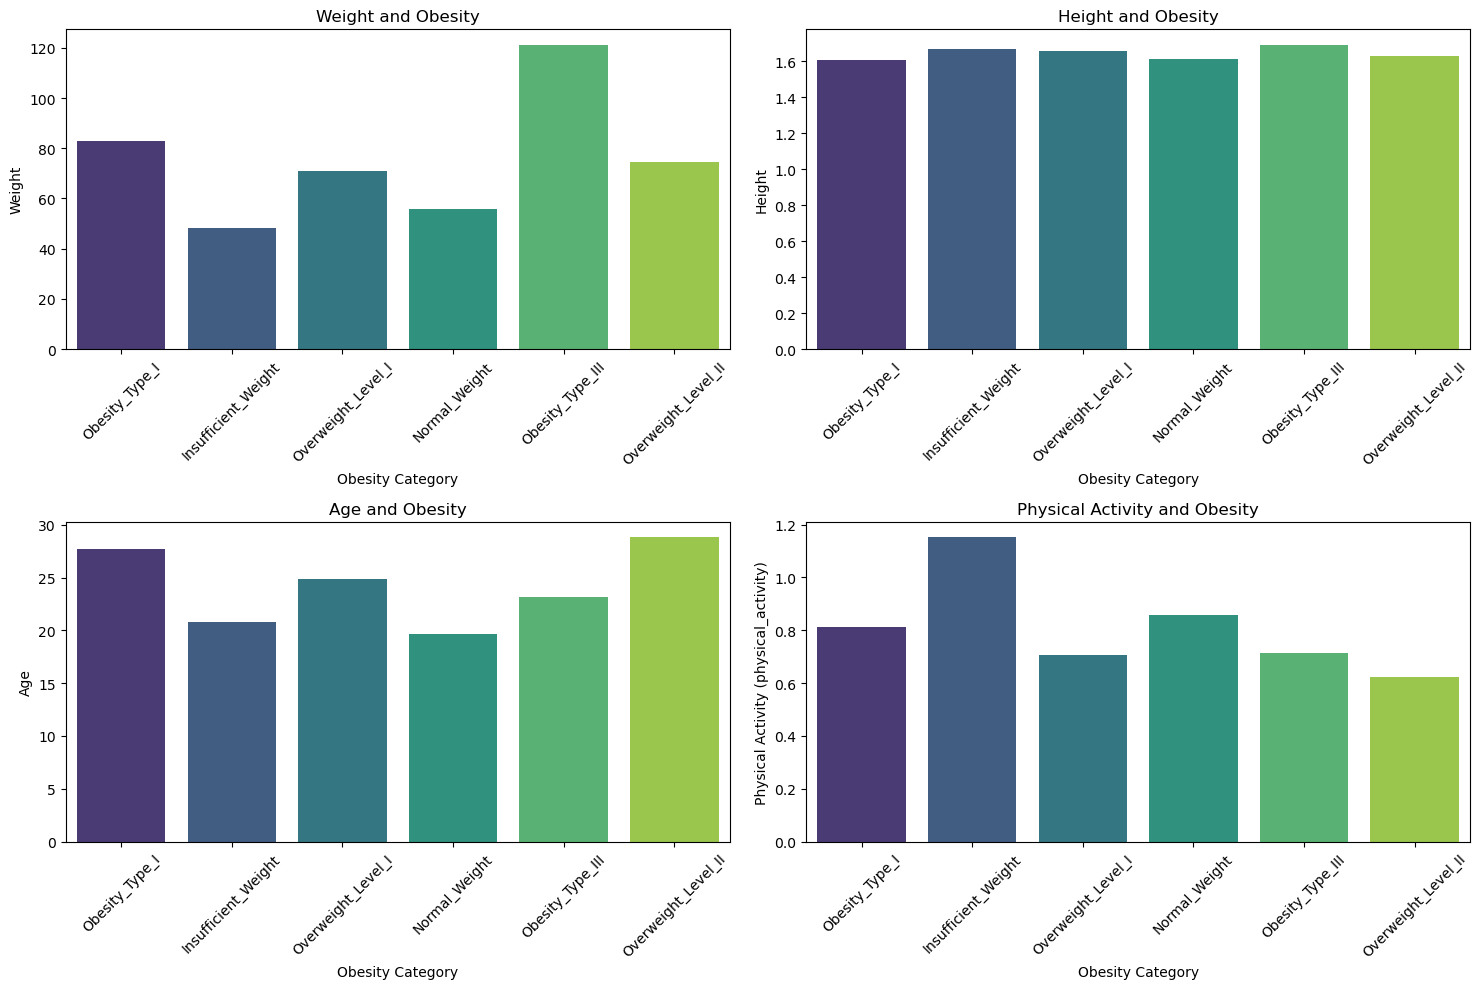

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Barplot 1 - Weight vs Obesity
sns.barplot(x=df2["obesity_level"], y=df2["Weight"], ci=None, palette="viridis", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xlabel("Obesity Category")
axes[0, 0].set_ylabel("Weight")
axes[0, 0].set_title("Weight and Obesity")

# Barplot 2 - Height vs Obesity
sns.barplot(x=df2["obesity_level"], y=df2["Height"], ci=None, palette="viridis", ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xlabel("Obesity Category")
axes[0, 1].set_ylabel("Height")
axes[0, 1].set_title("Height and Obesity")

# Barplot 3 - Age vs Obesity
sns.barplot(x=df2["obesity_level"], y=df2["Age"], ci=None, palette="viridis", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xlabel("Obesity Category")
axes[1, 0].set_ylabel("Age")
axes[1, 0].set_title("Age and Obesity")

# Barplot 4 - Physical Activity vs Obesity (FAF → physical_activity)
sns.barplot(x=df2["obesity_level"], y=df2["physical_activity"], ci=None, palette="viridis", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xlabel("Obesity Category")
axes[1, 1].set_ylabel("Physical Activity (physical_activity)")
axes[1, 1].set_title("Physical Activity and Obesity")

# Adjust layout
plt.tight_layout()

plt.savefig('female_1.png')
# Show the plots
plt.show()


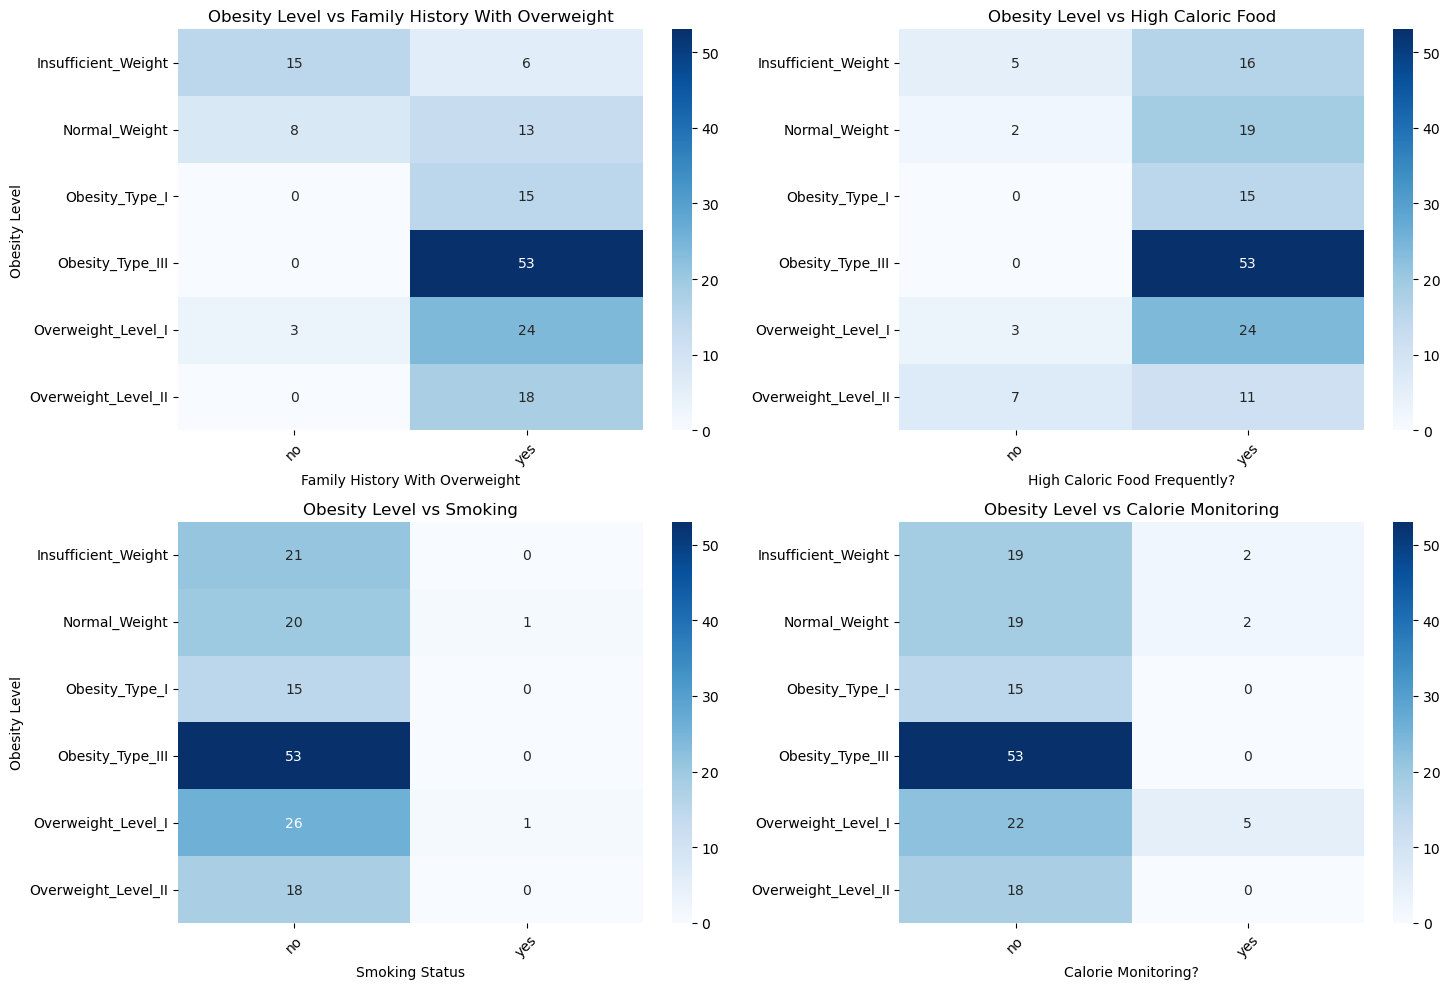

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns
fig.subplots_adjust(wspace=1, hspace=3) 

# Heatmap 1: obesity_level vs family_history_with_overweight
ct1 = pd.crosstab(df2['obesity_level'], df2['family_history_with_overweight'])
sns.heatmap(ct1, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Obesity Level vs Family History With Overweight')
axes[0, 0].set_xlabel('Family History With Overweight')
axes[0, 0].set_ylabel('Obesity Level')
axes[0, 0].tick_params(axis='x', rotation=45)

# Heatmap 2: obesity_level vs high_caloric_food
ct2 = pd.crosstab(df2['obesity_level'], df2['high_caloric_food'])
sns.heatmap(ct2, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Obesity Level vs High Caloric Food')
axes[0, 1].set_xlabel('High Caloric Food Frequently?')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Heatmap 3: obesity_level vs smoking
ct3 = pd.crosstab(df2['obesity_level'], df2['smoking'])
sns.heatmap(ct3, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Obesity Level vs Smoking')
axes[1, 0].set_xlabel('Smoking Status')
axes[1, 0].set_ylabel('Obesity Level')
axes[1, 0].tick_params(axis='x', rotation=45)

# Heatmap 4: obesity_level vs monitor_num_calories
ct4 = pd.crosstab(df2['obesity_level'], df2['monitor_num_calories'])
sns.heatmap(ct4, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Obesity Level vs Calorie Monitoring')
axes[1, 1].set_xlabel('Calorie Monitoring?')
axes[1, 1].set_ylabel('')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.savefig('female_2.png')
plt.show()


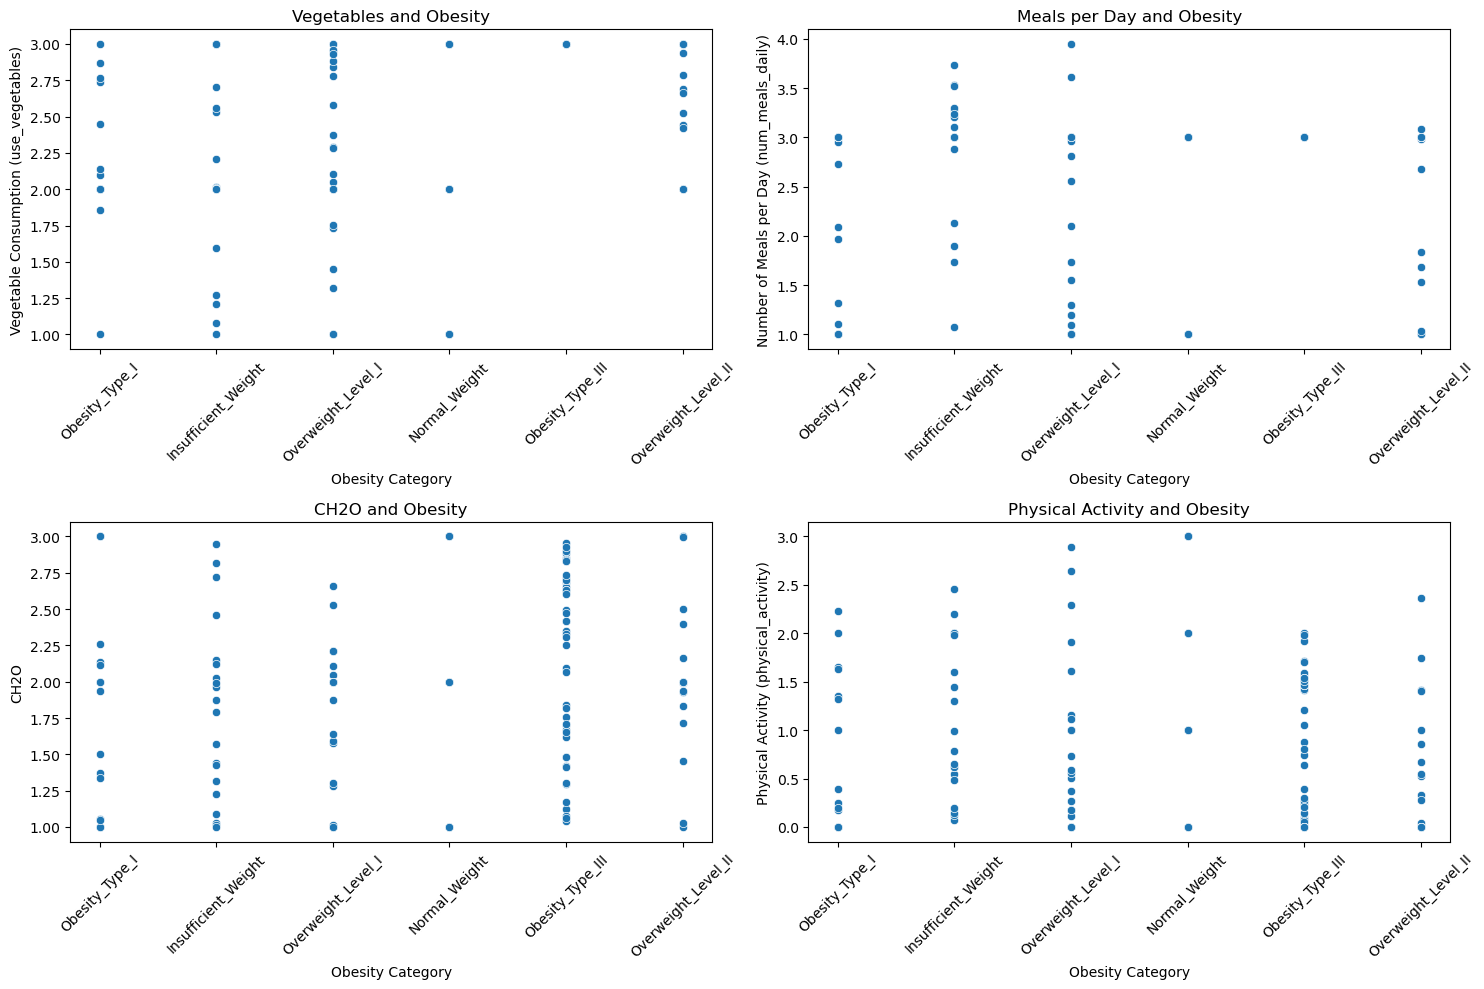

In [70]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Scatterplot 1 - use_vegetables vs obesity_level
sns.scatterplot(x=df2["obesity_level"], y=df2["use_vegetables"], ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xlabel("Obesity Category")
axes[0, 0].set_ylabel("Vegetable Consumption (use_vegetables)")
axes[0, 0].set_title("Vegetables and Obesity")

# Scatterplot 2 - num_meals_daily vs obesity_level
sns.scatterplot(x=df2["obesity_level"], y=df2["num_meals_daily"], ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xlabel("Obesity Category")
axes[0, 1].set_ylabel("Number of Meals per Day (num_meals_daily)")
axes[0, 1].set_title("Meals per Day and Obesity")

# Scatterplot 3 - CH2O vs obesity_level (No change)
sns.scatterplot(x=df2["obesity_level"], y=df2["CH2O"], ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xlabel("Obesity Category")
axes[1, 0].set_ylabel("CH2O")
axes[1, 0].set_title("CH2O and Obesity")

# Scatterplot 4 - physical_activity vs obesity_level
sns.scatterplot(x=df2["obesity_level"], y=df2["physical_activity"], ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xlabel("Obesity Category")
axes[1, 1].set_ylabel("Physical Activity (physical_activity)")
axes[1, 1].set_title("Physical Activity and Obesity")

# Adjust layout
plt.tight_layout()

plt.savefig('female_3.png')
# Show the plots
plt.show()



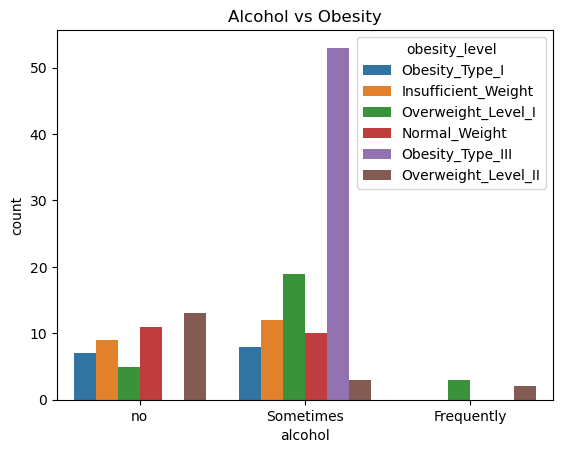

In [71]:
sns.countplot(x='alcohol', hue='obesity_level', data=df2)
plt.title('Alcohol vs Obesity')
plt.savefig('female_4.png')
plt.show()

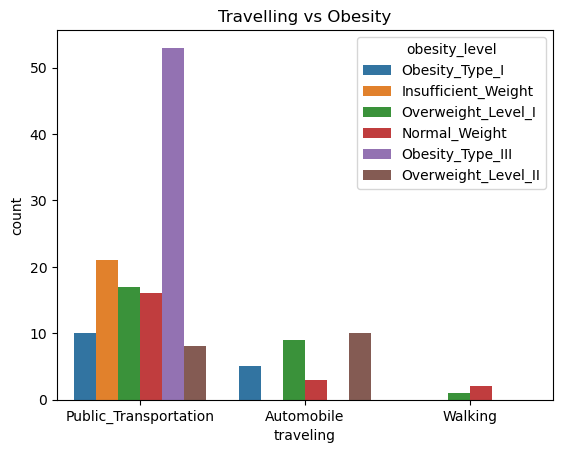

In [72]:
sns.countplot(x='traveling', hue='obesity_level', data=df2)
plt.title('Travelling vs Obesity')
plt.savefig('female_5.png')
plt.show()